# <a id='toc1_'></a>[Notebook4: Plotting in Python Exercises](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Notebook4: Plotting in Python Exercises](#toc1_)    
  - [Aufgabe 1](#toc1_1_)    
  - [Aufgabe 2](#toc1_2_)    
  - [Aufgabe 3](#toc1_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Aufgabe 1](#toc0_)

Lade pandas (pd), matplotlib.pyplot (plt) und seaborn (sns). Importiere
den avocado.csv Datensatz als "df_avo". Verschaffe dir dann einen 
Überblick über den Datensatz mit einer Methode deiner Wahl.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_avo = pd.read_csv("data/NB4/avocado.csv", sep = ",")

In [66]:
df_avo.head() #erste paar rows anschauen

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## <a id='toc1_2_'></a>[Aufgabe 2](#toc0_)

Dich interessiert die Verteilung des durchschnittlichen Preis der 
Avocados. Erstelle folgenden Plot (Tipp: sns.histplot() und
sns.kdeplot()):

<img src="data/visuals/hist_kde.png"/>

In [ ]:
# Erstelle figure und axis
fig, ax = plt.subplots() #Note, syntax: variable1, variable2 = 3, 5 

# Histogram plot mit seaborn

sns.histplot(df_avo['AveragePrice'], kde=False, stat='density')
sns.kdeplot(df_avo['AveragePrice'], color='orange')

# Axenbeschriftungen
ax.set_xlabel('Average Price in USD')
ax.set_ylabel('Density')
ax.set_title('Histogram of Avocado Prices')

# Display the plot
plt.show()

## <a id='toc1_3_'></a>[Aufgabe 3](#toc0_)

Jetzt wollen wir den Avocadokonsum über die Jahre hinweg darstellen.
Erstelle folgenden Barplot:

<img src="data/visuals/bar_year.png"/>

In [53]:
#Konvertiere Date Col in den datetime64 dtype:
df_avo["Date"] = pd.to_datetime(df_avo["Date"])

#Gruppiere nach Jahren:

year = df_avo["Date"].dt.year #dt accessor greift auf date components zu

df_avo_GR_year = df_avo.groupby(year)

Total_year = df_avo_GR_year["Total Volume"].sum()

Total_year

Date
2015    4.385469e+09
2016    4.820890e+09
2017    4.934306e+09
2018    1.382738e+09
Name: Total Volume, dtype: float64

Text(0, 0.5, 'Total Number of Avocados Sold (x $10^9$)')

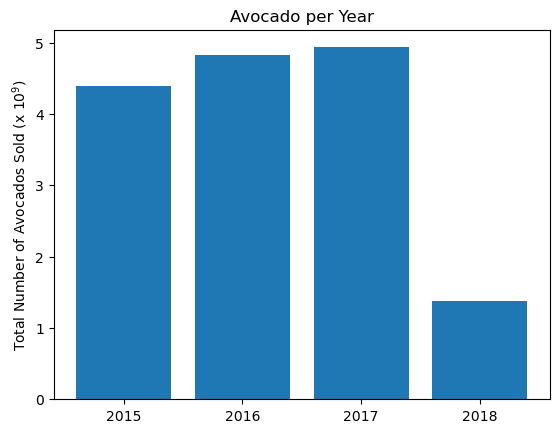

In [70]:
#Plotte  die Werte als barchart:

plt.bar(x = Total_year.index,
        height = Total_year)

plt.title('Avocado per Year')

plt.xticks(Total_year.index)
plt.gca().yaxis.get_offset_text().set_visible(False)
plt.ylabel('Total Number of Avocados Sold (x $10^9$)')